# iNaturalist Lab

In [1]:
import keras
import tensorflow.keras
import os
from os import listdir
import shutil
from random import sample
import pandas as pd
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
keras.__version__

2022-03-01 23:52:20.421080: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/R/4.0.5/lib/R/lib::/lib:/usr/local/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/java-11-openjdk-amd64/lib/server
2022-03-01 23:52:20.421144: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.6.0'

## Data

The data for this project was compiled into `inat` directory using the `lab4-preprocessing.R` RScript. 

In [2]:
base_dir = '/Users/palomacartwright/EDS232-mine/eds232-lab4/inat'

# **2 Species (binary classification) - neural net.** 
Draw from 3.4 🍿 Movies (binary classification). 

You’ll need to pre-process the images to be a consistent shape first though – see 5.2.4 Data preprocessing.

In [3]:
train_dir = os.path.join(base_dir, 'spp2/train')
validation_dir = os.path.join(base_dir, 'spp2/validation')
test_dir = os.path.join(base_dir, 'spp2/test')

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=4,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')


Found 60 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [4]:

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (4, 150, 150, 3)
labels batch shape: (4,)


## Neural Net Modelling

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(150, 150, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-03-01 23:53:13.764685: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/R/4.0.5/lib/R/lib::/lib:/usr/local/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/java-11-openjdk-amd64/lib/server
2022-03-01 23:53:13.764718: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-01 23:53:13.764738: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (taylor): /proc/driver/nvidia/version does not exist
2022-03-01 23:53:13.765104: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the ap

In [6]:
# optimizing and choosing loss function 
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150, 150, 16)      64        
_________________________________________________________________
flatten (Flatten)            (None, 360000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                5760016   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 5,760,097
Trainable params: 5,760,097
Non-trainable params: 0
_________________________________________________________________


## Validation

In [7]:
# Model Fit 

history = model.fit(train_generator,
                    steps_per_epoch=5,
                    epochs=40,
                    validation_data=validation_generator,
                    validation_steps = 5)

2022-03-01 23:53:28.128141: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
5/5 [==============================] - 2s 211ms/step - loss: 47.7986 - accuracy: 0.5000 - val_loss: 35.9290 - val_accuracy: 0.5000
Epoch 2/40
5/5 [==============================] - 0s 66ms/step - loss: 47.0723 - accuracy: 0.4500 - val_loss: 4.9425 - val_accuracy: 0.7000
Epoch 3/40
5/5 [==============================] - 0s 77ms/step - loss: 14.0444 - accuracy: 0.6000 - val_loss: 72.5436 - val_accuracy: 0.5000
Epoch 4/40
5/5 [==============================] - 0s 62ms/step - loss: 15.5702 - accuracy: 0.7000 - val_loss: 11.2169 - val_accuracy: 0.6500
Epoch 5/40
5/5 [==============================] - 0s 68ms/step - loss: 16.7416 - accuracy: 0.6000 - val_loss: 50.1513 - val_accuracy: 0.5000
Epoch 6/40
5/5 [==============================] - 0s 69ms/step - loss: 4.8149 - accuracy: 0.8500 - val_loss: 27.5354 - val_accuracy: 0.5000
Epoch 7/40
5/5 [==============================] - 1s 122ms/step - loss: 14.4418 - accuracy: 0.6000 - val_loss: 14.6371 - val_accuracy: 0.6000
Epoch 8/40
5/

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

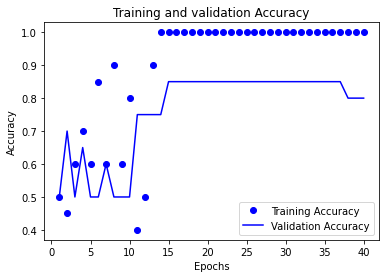

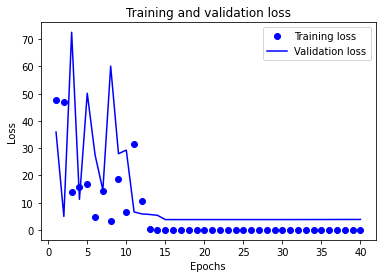

In [10]:
# Plots
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size = (150, 150), 
        batch_size = 4, 
        class_mode = 'binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps = 5)
print("test_acc:", test_acc)
print("test_loss:", test_loss)

Found 20 images belonging to 2 classes.


/opt/python/3.7.7/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test_acc: 0.800000011920929
test_loss: 5.312117099761963


## **2 Species (binary classification) - convolutional neural net.**


## Build the Convolutional Neural Net Model

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Compile the Model

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)      

In [17]:
history_2 = model.fit(train_generator,
                   steps_per_epoch = 5,
                   epochs = 40,
                   validation_data = validation_generator, 
                   validation_steps = 5)

Epoch 1/40
5/5 [==============================] - 1s 107ms/step - loss: 0.3658 - acc: 0.9000 - val_loss: 0.6984 - val_acc: 0.6500
Epoch 2/40
5/5 [==============================] - 1s 137ms/step - loss: 0.2888 - acc: 0.9000 - val_loss: 0.2716 - val_acc: 0.9000
Epoch 3/40
5/5 [==============================] - 0s 84ms/step - loss: 0.2181 - acc: 0.9500 - val_loss: 0.3819 - val_acc: 0.9000
Epoch 4/40
5/5 [==============================] - 0s 71ms/step - loss: 0.3618 - acc: 0.8500 - val_loss: 0.2700 - val_acc: 0.9000
Epoch 5/40
5/5 [==============================] - 0s 101ms/step - loss: 0.1823 - acc: 0.9500 - val_loss: 0.2781 - val_acc: 0.9000
Epoch 6/40
5/5 [==============================] - 0s 96ms/step - loss: 0.4097 - acc: 0.7000 - val_loss: 0.2355 - val_acc: 0.9500
Epoch 7/40
5/5 [==============================] - 0s 78ms/step - loss: 0.2961 - acc: 0.9000 - val_loss: 0.2410 - val_acc: 0.9000
Epoch 8/40
5/5 [==============================] - 0s 109ms/step - loss: 0.1584 - acc: 0.9500 -

### Accuracy and Loss 

In [19]:
acc_2 = history_2.history['acc']
val_acc_2 = history_2.history['val_acc']
loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs_2 = range(len(acc_2))

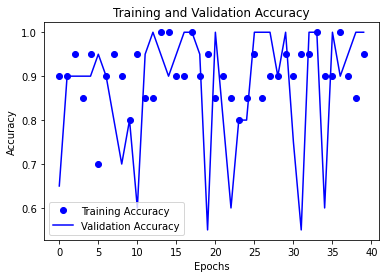

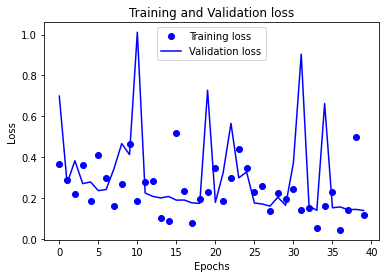

In [21]:
# Plots
plt.plot(epochs_2, acc_2, 'bo', label='Training Accuracy')
# b is for "solid blue line"
plt.plot(epochs_2, val_acc_2, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# "bo" is for "blue dot"
plt.plot(epochs_2, loss_2, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs_2, val_loss_2, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=5)
print('test acc:', test_acc)
print('test loss:', test_loss)

Found 20 images belonging to 2 classes.
test acc: 0.949999988079071
test loss: 0.16426196694374084


# Comparison of the results for 2-Species Analysis

The test accuracy for the convolutional neural network is higher than that of the standard neiral network. The convolutional neural net also has lower loss than the other model. These combined means that there are less errors which occur less frequently meaning that the convolutionalneural netowrk is performing better than the standard neural network. 

## **10 Species (multi-class classification) - neural net.** 
Draw from 3.5 📰 Newswires (multi-class classification).

## **10 Species (multi-class classification) - convolutional neural net.** 
Draw from dogs vs cats example and update necessary values to go from binary to mult-class classification.